In [1]:
# Neophodne biblioteke: 

# math je biblioteka potrebna zbog funkcije math.isnan(e), fja prihvata float argument e i kao rezultat vraća
# boolean vrijednost koja govori da li je argument e nan (tj. nedefinisana vrijednost)
import math
# pandas je open source Python paket koji koristim za analizu podataka
import pandas as pd
# numpy je open source Python paket za nizove koji olakšavaju napredne matematičke i druge vrste operacija na
# velikom broju podataka
import numpy as np

In [2]:
# Učitavanje podataka: 

# pretvaranje dataset-a 'data.csv' u matricu (niz nizova) i dodijeljivanje varijabli copy_data
data_copy = pd.read_csv('data.csv').to_numpy()
# primjetimo da su polja nulte, četvrte i pete kolone stringovne vrijednosti, dok su polja preostalih kolona float vrijednosti
data_copy

array([['C', 5.86, 11.59, ..., ' 50.87', ' 11.72', 5.578],
       ['B', 5.54, 56.06, ..., ' 76.01', ' 11.08', 32.45],
       ['C', 70.21, 69.1, ..., ' 79.92', ' 140.42', 7.589],
       ...,
       ['A', 32.3, 54.55, ..., ' 213213116.34', ' 64.6', 32.3],
       ['A', 39.2, 28.94, ..., ' 94.28', ' 78.4', 39.2],
       ['A', 11.8, 38.51, ..., ' 82.47', ' 23.6', 11.8]], dtype=object)

In [3]:
# Detaljna analiza podataka: 

# postoje redovi koji imaju polja prve kolone prazna
# -- takve redove sam izbacio iz dataset-a
# postoje redovi koji imaju neprazna polja prve kolone različita od 'A', 'B' i 'C',
# preciznije string 'F' se pojavljuje tačno jednom u polju prve kolone jednog reda
# -- takve redove sam izbacio iz dataset-a

# postoje redovi koji imaju prazna polja kolona mimo prve i zadnje
# -- takvim redovima sam ta polja postavio na vrijednost 0, a kasnije kod dopunjavanja vrijednosti
# -- sam im dodijelio aritmetičku sredinu preostalih redova koji nemaju vrijednost 0 u tom polju

# postoje redovi koji imaju prazna polja zadnje kolone tj. imaju nedefinisane labele
# -- takve redove sam izbacio iz dataset-a

data = []
redni_broj_reda = 2 # jer u excel fajlu 'data.csv' redovi počinju od druge kolone
for row in data_copy:
    new_row = []
    i = 0
    for element in row:
        if i == 0: # nulta kolona
            if (not element) or element == ' '  or (element != 'A' and element != 'B' and element != 'C'):
                print("Red " + str(redni_broj_reda) + " - U nultoj koloni: Imamo polje koje je ili null, ili prazno, " + 
                      "ili nije ni A, ni B, ni C \n")
                break
            new_row.append(element)
        elif i != 6: # između nulte i šeste kolone
            if (not element) or element == ' ':
                print("Red " + str(redni_broj_reda) + " - Između nulte i šeste kolone: Imamo polje koje je ili null, " + 
                      "ili prazno \n")
                new_row.append(0)
            else:
                new_row.append(float(element))
        else: # šesta kolona
            if math.isnan(element):
                print("Red " + str(redni_broj_reda) + " - U zadnjoj koloni: Imamo polje koje je prazno \n")
                new_row = []
                break
            else:
                new_row.append(float(element))
        i += 1
    if new_row == []: # u ovom slučaju ne dodajemo red u data-set
        print("Red " + str(redni_broj_reda) + " - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu \n")
        redni_broj_reda += 1
        continue
    redni_broj_reda += 1
    data.append(new_row)

data = np.array(data)
data

Red 371 - U zadnjoj koloni: Imamo polje koje je prazno 

Red 371 - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu 

Red 372 - U zadnjoj koloni: Imamo polje koje je prazno 

Red 372 - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu 

Red 401 - Između nulte i šeste kolone: Imamo polje koje je ili null, ili prazno 

Red 411 - Između nulte i šeste kolone: Imamo polje koje je ili null, ili prazno 

Red 430 - U nultoj koloni: Imamo polje koje je ili null, ili prazno, ili nije ni A, ni B, ni C 

Red 430 - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu 

Red 434 - U nultoj koloni: Imamo polje koje je ili null, ili prazno, ili nije ni A, ni B, ni C 

Red 434 - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu 

Red 435 - U nultoj koloni: Imamo polje koje je ili null, ili prazno, ili nije ni A, ni B, ni C 

Red 435 - Ovaj red ne dodajemo jer ima loše definisanu nultu ili zadnju kolonu 

Red 486 - U nultoj koloni:

array([['C', '5.86', '11.59', ..., '50.87', '11.72', '5.578'],
       ['B', '5.54', '56.06', ..., '76.01', '11.08', '32.45'],
       ['C', '70.21', '69.1', ..., '79.92', '140.42', '7.589'],
       ...,
       ['A', '32.3', '54.55', ..., '213213116.34', '64.6', '32.3'],
       ['A', '39.2', '28.94', ..., '94.28', '78.4', '39.2'],
       ['A', '11.8', '38.51', ..., '82.47', '23.6', '11.8']], dtype='<U32')

In [4]:
# Viška kolona: 

# predzadnja kolona u 'data.csv' je viška, jer predstavlja duple vrijednosti polja druge kolone
# može se posmatrati i iz drugog ugla: druga kolona je viška jer predstavlja duplo manje vrijednosti polja predzadnje kolone
# -- stoga sam posmatrao dataset bez predzadnje kolone

X = data[:, :-2] # X uzima prvih 5 kolona svih filtriranih redova
y = data[:, -1] # y uzima posljednju kolonu svih filtriranih redova

In [5]:
## Testiranje podudaranja broja redova u X i y

print(str(len(X)) + " == " + str(len(y)))

# vidimo da je izbačeno samo 8 redova, i to izbačeni su samo oni redovi koji imaju prazno prvo polje ili prazno zadnje polje
# te izbačen je jedan red koje u prvom polju ima string 'F', pretpostavljam da je to pogrešan unos

9992 == 9992


Trebam obrisati 1 redova u koloni4 
Trebam obrisati 2 redova u labelama 


C:\Users\Edin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


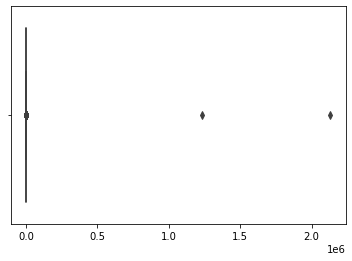

In [6]:
# Detektovanje anomalija:

# biblioteka potrebna za detekciju anomalija
import seaborn as sns

kolona1 = X[:, 1].astype(float)
kolona1
kolona2 = X[:, 2].astype(float)
kolona2
kolona3 = X[:, 3].astype(float)
kolona3
kolona4 = X[:, 4].astype(float)
kolona4
labele = y.astype(float)
labele

# grafički prikaz podataka, mijenjanjem paramtera fje boxplot, prikazuju se različiti podaci...
sns.boxplot(labele)

# ispod posebno posmatram odudarajuće podatke (anomalije) u 4oj koloni X-a i one u y-onu
# jer boxplot ne prikaže dobro interval za njihove neodudarajuće podatke 

# ovdje sam testirao anomalije u petoj po redu koloni u X-u tj. onu sa indeksom 4

brojac = 0
for i in range(len(X)):
    if 200 < float(X[i][4]):
        brojac += 1
print("Trebam obrisati " + str(brojac) + " redova u koloni4 ")

# ovdje sam testirao anomalije u y-onu

brojac = 0
for i in range(len(y)):
    if 2000 < float(y[i]):
        brojac += 1
print("Trebam obrisati " + str(brojac) + " redova u labelama ")

In [7]:
# Uklanjanje anomalija:
indeksi_za_obrisati = []
for i in range(len(X)):
    if float(X[i][1]) < 0 or float(X[i][1]) > 100:
        indeksi_za_obrisati.append(i)
    elif float(X[i][2]) < -45 or float(X[i][2]) > 100:
        indeksi_za_obrisati.append(i)
    elif float(X[i][3]) < 0 or float(X[i][3]) > 100:
        indeksi_za_obrisati.append(i)
    elif float(X[i][4]) < 0 or float(X[i][4]) > 200:
        indeksi_za_obrisati.append(i)
    elif float(y[i]) < 0 or float(y[i]) > 2000:
        indeksi_za_obrisati.append(i)
        
print("Obrisati ću " + str(len(indeksi_za_obrisati)) + " redova ")

Obrisati ću 312 redova 


In [8]:
X = np.delete(X, indeksi_za_obrisati, axis = 0)
y = np.delete(y, indeksi_za_obrisati, axis = 0)

Obrisati ću 1209 redova 


C:\Users\Edin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


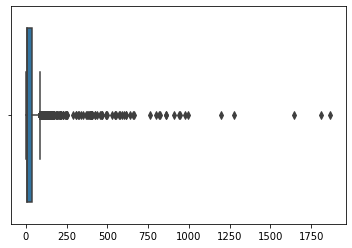

In [9]:
# Ponovno detektovanje anomalija:

# ponovno posmatranje odudarajućih podataka za 4tu X kolonu i labele tj. y
# jer ih boxplot nije mogao fino prikazati zbog nekih jako odudarajućih podataka koje sam uklonio iznad...

kolona4 = X[:, 4].astype(float)
kolona4
labele = y.astype(float)
labele
sns.boxplot(labele)

indeksi_za_obrisati = []
for i in range(len(X)):
    if float(X[i][4]) > 100:
        indeksi_za_obrisati.append(i)
    elif float(y[i]) > 70:
        indeksi_za_obrisati.append(i)
        
print("Obrisati ću " + str(len(indeksi_za_obrisati)) + " redova ")

In [10]:
# Ponovno uklanjanje anomalija:
X = np.delete(X, indeksi_za_obrisati, axis = 0)
y = np.delete(y, indeksi_za_obrisati, axis = 0)

In [11]:
# Dopunjavanje vrijednosti 
from sklearn.impute import SimpleImputer

# postoje redovi koji imaju prazna polja kolona mimo prve i zadnje
# -- takvim redovima sam ta polja postavio na vrijednost 0, a ovdje kod dopunjavanja vrijednosti
# -- sam im dodijelio vrijednost aritmetičke sredine preostalih redova koji nemaju vrijednost 0 u tom polju
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(X[:, 1:6])
X[:, 1:6] = imputer.transform(X[:, 1:6])
X

array([['C', '5.86', '11.59', '75.54', '50.87'],
       ['B', '5.54', '56.06', '36.59', '76.01'],
       ['C', '70.21', '69.1', '47.9', '79.92'],
       ...,
       ['B', '80.16', '98.09', '69.2', '60.94'],
       ['A', '39.2', '28.94', '22.67', '94.28'],
       ['A', '11.8', '38.51', '2.15', '82.47']], dtype='<U32')

In [12]:
# Kategorički podaci
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# postoje tri kategorije koje odgovaraju poljima nulte kolone i to stringovi 'A', 'B' i 'C'
# stoga nultu kolonu enkodiram koristeći OneHotEncoder(), kako bi polja svih kolona bila numerički podaci
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)
X[0]

array(['0.0', '0.0', '1.0', '5.86', '11.59', '75.54', '50.87'],
      dtype='<U32')

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split

# odvajanje podataka u dvije skupine: 
# 1. train (treniramo algoritam nad ovim podacima)
# 2. test (testiramo efikanost istreniranog algoritma nad ovim podacima)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

# skaliranje podataka radi brže konvergencije, ne radimo to za prve 3 kolone, jer su to biti dobijeni
# primjenom OneHotEncoder()-a...
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [15]:
# KNN algoritam
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Greška KNN-a
absulutna_greska_1 = mean_absolute_error(y_test, predictions)
kvadratna_greska_1 = mean_squared_error(y_test, predictions)
kvadratna_greska_1
absulutna_greska_1

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

3.8270594020456326

In [17]:
# SVR algoritam
from sklearn.svm import SVR

clf2 = SVR()
clf2.fit(X_train,y_train)
predictions2 = clf2.predict(X_test)
predictions2

array([ 5.82981947,  5.21128278, 48.24562793, ...,  8.99981743,
       11.19061693, 21.53023692])

In [18]:
# Greška SVR-a
absulutna_greska_2 = mean_absolute_error(y_test, predictions2)
kvadratna_greska_2 = mean_squared_error(y_test, predictions2)
kvadratna_greska_2
absulutna_greska_2

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


2.221044166969768

In [19]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

clf3 = DecisionTreeRegressor(random_state=0)
clf3.fit(X_train,y_train)
predictions3 = clf3.predict(X_test)
predictions3

array([ 5.545,  5.075, 47.76 , ...,  8.383, 13.875, 37.401])

In [20]:
# Greška DecisionTreeRegressor-a
absulutna_greska_3 = mean_absolute_error(y_test, predictions3)
kvadratna_greska_3 = mean_squared_error(y_test, predictions3)
kvadratna_greska_3
absulutna_greska_3

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.8454012588512982

In [21]:
# LinearRegressor
from sklearn.linear_model import LinearRegression
clf4 = LinearRegression()
clf4.fit(X_train,y_train)
predictions4 = clf4.predict(X_test)
predictions4

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([ 8.5078125, 10.1953125, 31.28125  , ..., 11.375    ,  7.640625 ,
       14.7578125])

In [22]:
# Greška LinearRegressor-a
absulutna_greska_4 = mean_absolute_error(y_test, predictions4)
kvadratna_greska_4 = mean_squared_error(y_test, predictions4)
kvadratna_greska_4
absulutna_greska_4

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


8.242575457317074

In [23]:
# BaggingRegressor
from sklearn.ensemble import BaggingRegressor
clf5 = BaggingRegressor(random_state=0)
clf5.fit(X_train,y_train)
predictions5 = clf5.predict(X_test)
predictions5

array([ 5.8364,  5.0771, 47.726 , ...,  8.8661, 14.0418, 34.4162])

In [24]:
y_test

array(['5.739', '5.068', '47.71', ..., '8.824', '13.337', '32.359'],
      dtype='<U32')

In [25]:
# Greška BaggingRegressor-a
absulutna_greska_5 = mean_absolute_error(y_test, predictions5)
kvadratna_greska_5 = mean_squared_error(y_test, predictions5)
kvadratna_greska_5
absulutna_greska_5

C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Edin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.494270613690008

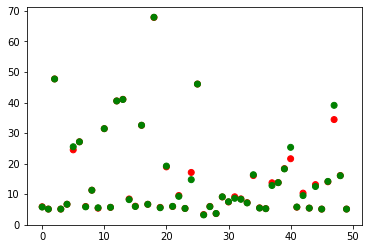

In [26]:
# Grafički prikaz rezultata:

# neophodna biblioteka za iscrtavanje
import matplotlib.pyplot as plt

# ispod kupim prvih 50 predikcija iz BaggingTreeRegressor-a, te 50 stvarnih vrijednosti za te redove
# te predikcije iscrtavam crvenom bojom, a stvarne vrijednosti zelenom bojom
# vidimo da je većina zelenih kružića 'preklopila' crvene kružiće, jer su predikcije odlične
# dok postoje poneki zeleni kružići koji su iznad ili ispod crvenih, jer predikcije malo odstupaju od stvarnih vrijednosti
# zašto samo 50 predikcija iscrtavam? Jer iscrtavanjem svih predikcija, kojih ima preko 1500, nije toliko fina preglednost
# U čeliji ispod ove uradio sam i to, tj. iscrtao sve predikcije i stvarne y_test vrijednosti
boje = []
yoni = []
for i in range(50):
    boje.append('red')
    yoni.append(predictions5[i])
for i in range(50):
    boje.append('green')
    yoni.append(y_test[i])
xovi = []
for i in range(50):
    xovi.append(i)
for i in range(50):
    xovi.append(i)

plt.scatter(xovi, yoni, c=boje)
plt.show()

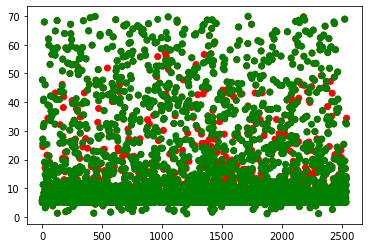

In [27]:
# Iscrtavanje svih predikcija i stvarnih y_test vrijednosti
boje = []
yoni = []
for i in range(len(predictions5)):
    boje.append('red')
    yoni.append(predictions5[i])
for i in range(len(predictions5)):
    boje.append('green')
    yoni.append(y_test[i])
xovi = []
for i in range(len(predictions5)):
    xovi.append(i)
for i in range(len(predictions5)):
    xovi.append(i)

plt.scatter(xovi, yoni, c=boje)
plt.show()